# Holiday Modeling Using Google Trends Data

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib

import cmdstanpy
cmdstanpy.install_cmdstan()
from cmdstanpy import CmdStanModel

from bayesian_holidays.src.holiday_model import fit_holiday_model
from bayesian_holidays.src.plot_utils import (
    plot_posteriors,
    get_individual_holidays,
    plot_individual_holidays
)

Installing CmdStan version: 2.30.1
Install directory: /Users/daniel.marthaler/.cmdstan
CmdStan version 2.30.1 already installed


### Choose data and fit model

In [3]:
df_xmas, fit_xmas = fit_holiday_model(
    "chocolate",
    start_date=None,
    train_split=80,
    num_chains=2,
    max_treedepth=10,
    adapt_delta=0.8
)


16:26:11 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

16:27:07 - cmdstanpy - INFO - CmdStan done processing.
16:27:07 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable[2] is inf, but must be positive finite! (in '/Users/daniel.marthaler/dev/bayesian_holidays/bayesian_holidays/src/new_holiday_model.stan', line 188, column 4 to column 50)
Exception: new_holiday_model_model_namespace::log_prob: lambda_tilde_m[1] is nan, but must be greater than or equal to 0.000000 (in '/Users/daniel.marthaler/dev/bayesian_holidays/bayesian_holidays/src/new_holiday_model.stan', line 137, column 2 to line 139, column 4)
Consider re-running with show_console=True if the above output is unclear!
16:27:07 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 22 divergent transitions (8.8%)
	Chain 2 had 26 divergent transitions (10.4%)
	Use function "diagnose()" to see further information.


### Plot posterior in hold out set

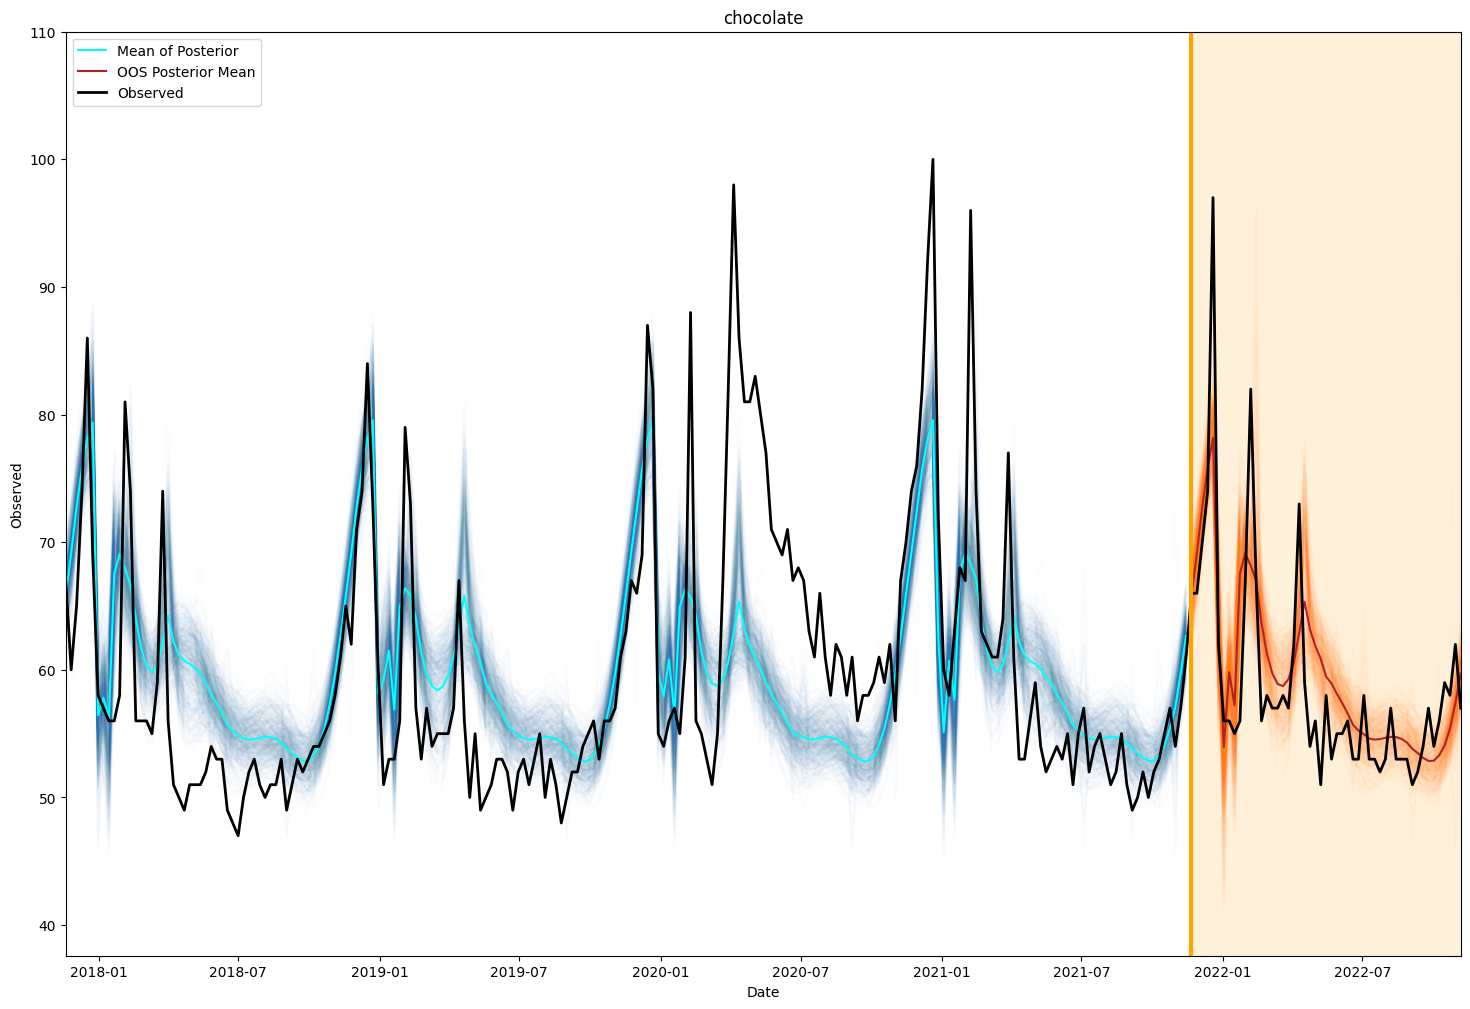

In [4]:
plot_posteriors(df_xmas, fit_xmas,"chocolate")

### Plot Holiday Components for this search term

In [5]:
holiday_list, hols_train, hols_test, df_train, df_test = get_individual_holidays(df_xmas, fit_xmas)

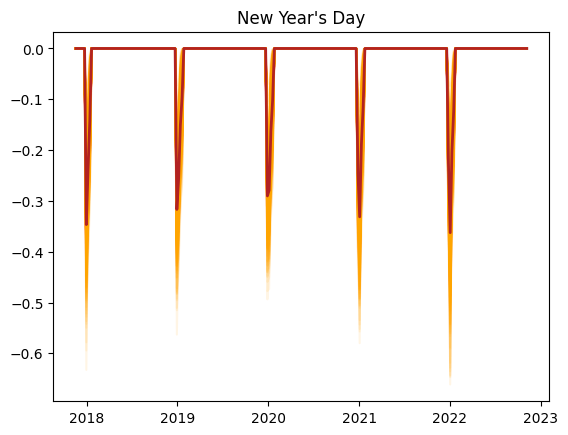

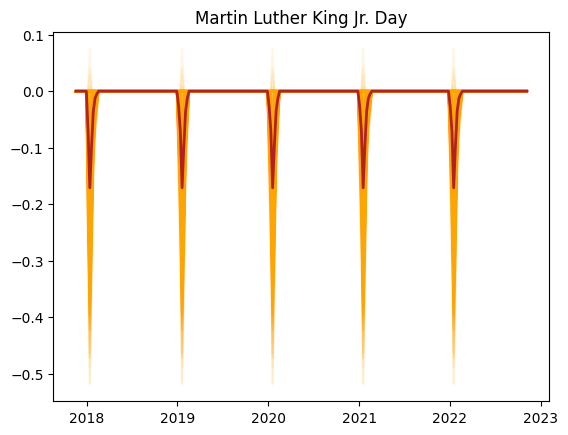

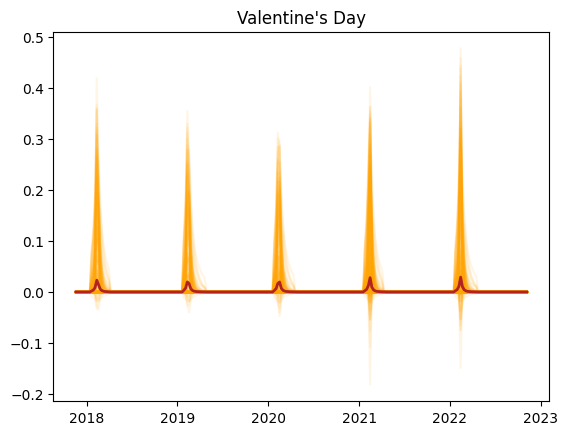

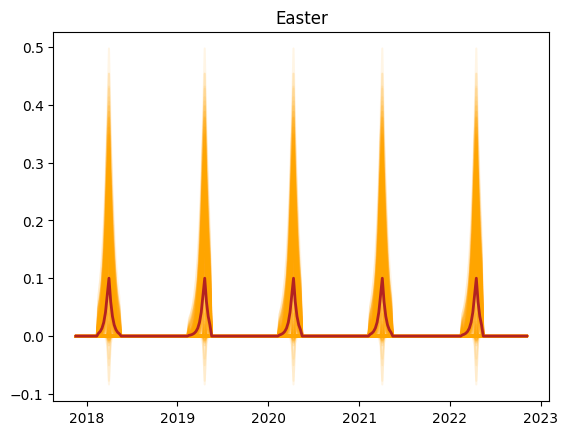

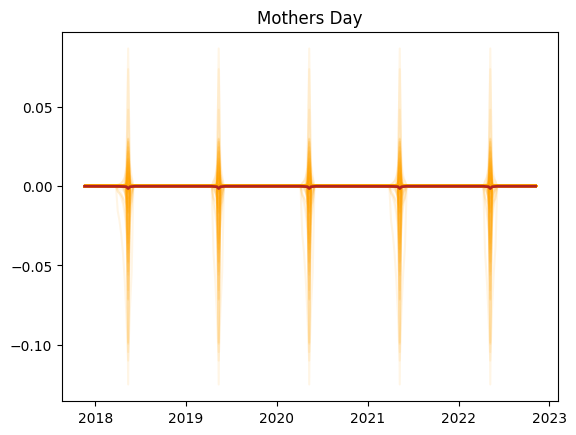

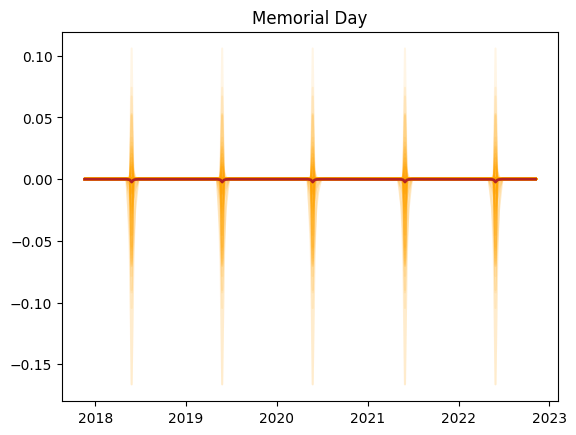

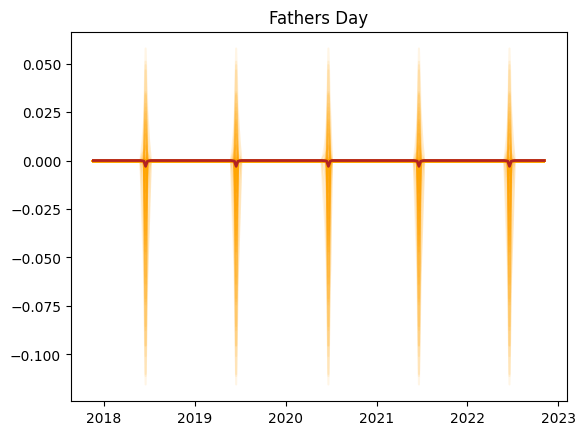

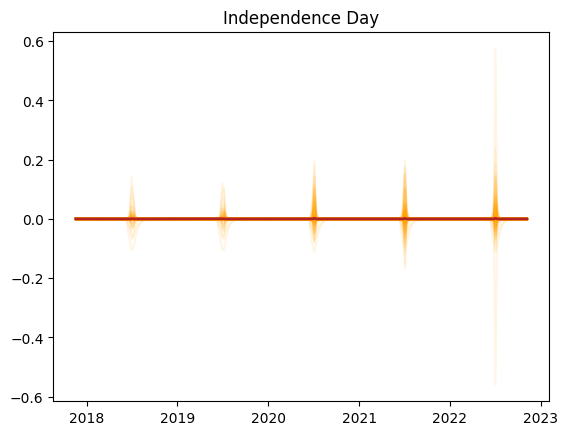

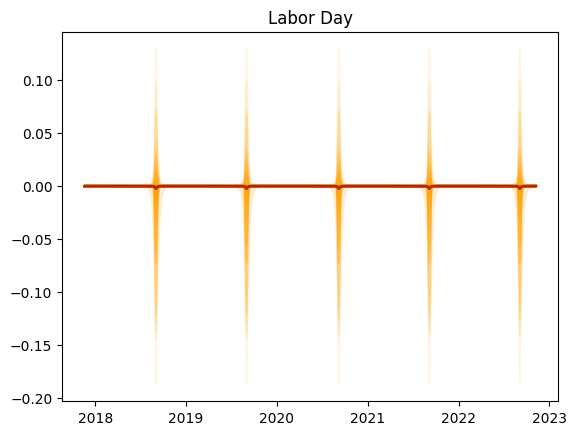

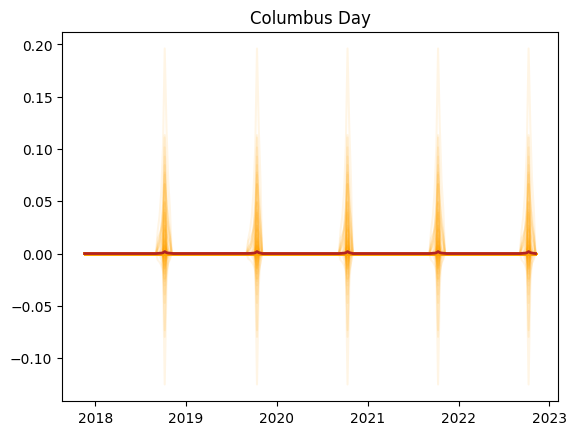

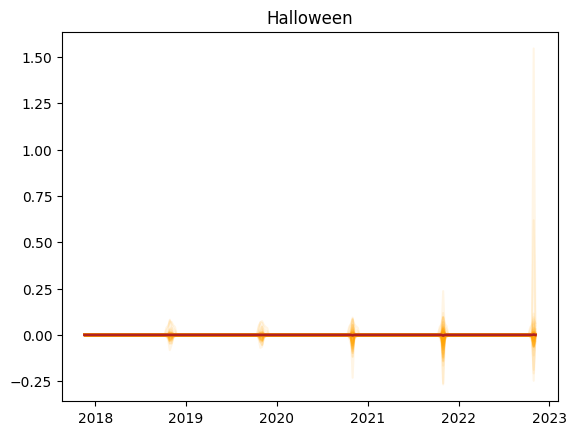

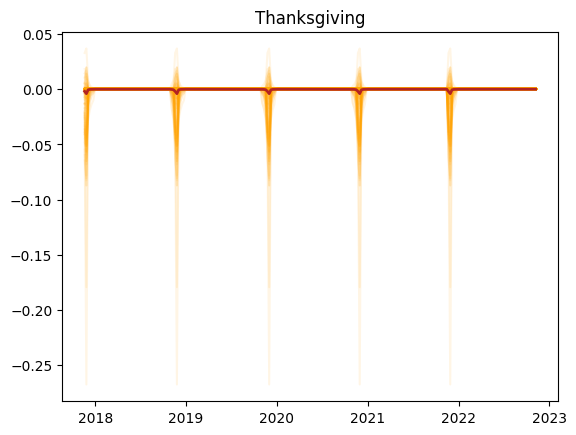

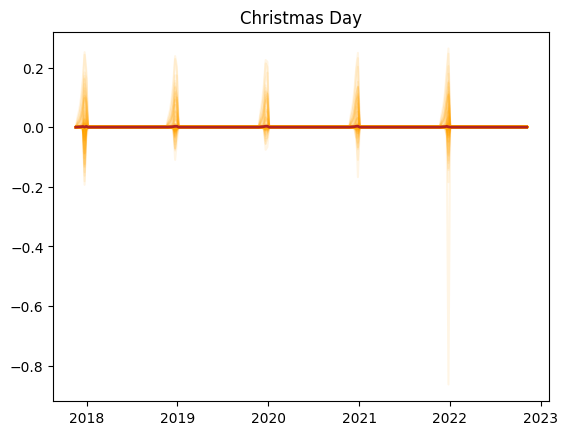

In [6]:
plot_individual_holidays(df_xmas.date,np.concatenate((hols_train, hols_test), axis=2), holiday_list.head(hols_test.shape[1]).HolidayName.values)